In [1]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [95]:
imPath = "/Volumes/Data/WORKSPACE/git/bagiks/CMT-Text-Detection/upload/146184941163422-2015.12.05-12.56.56.jpg"
#imPath = "/Volumes/Data/WORKSPACE/git/bagiks/CMT-Text-Detection/upload/87684941172522-2015.12.05-11.36.03.jpg"

In [96]:
img = cv2.imread(imPath)

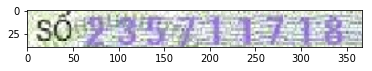

In [97]:
plt.imshow(img)

In [68]:
# retval, threshold = cv2.threshold(img, 10, 10, cv2.THRESH_BINARY)
def extract_digits(pic, path):
    img = pic
    abc = img.copy()#cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    abc = cv2.bitwise_not(abc)
    x, y  = abc.shape
    im = np.zeros(abc.shape).astype('uint8')

    size = 3
    for i in range(x-size):
        for j in range(y-size):
            if abc[i,j] > 80 and i > size and j >size:
                im[i-size:i+size,j-size:j+size] = 255

    abc = im
    print abc.shape
    fake = np.zeros(abc.shape).astype('uint8')

    blurred = cv2.GaussianBlur(abc, (5, 5), 0)
    xyz = cv2.Canny(abc, 200, 255)


    cnts, _ = cv2.findContours(xyz, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

    print len(cnts)
    i=0
    for c in cnts:
        if cv2.arcLength(c, True) > 100 :

            i = i + 1
            x,y,w,h = cv2.boundingRect(c)

            print cv2.boundingRect(c)

            core = img[y:y+h,x:x+w]
            npad = ( (10,10), (10,10))
            pad_img = np.pad(core, pad_width=npad, mode='constant', constant_values=255)

            cv2.imwrite(path +str(x)+"_"+str(y)+".jpg", np.array(pad_img))


#     plt.imshow(im)

#     cv2.imwrite("/Users/kidio/cnt.jpg", abc)

In [69]:
img_hsv=cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# lower mask (0-10)
lower_red = np.array([0,0,0])
upper_red = np.array([180, 255, 30])
mask0 = cv2.inRange(img_hsv, lower_red, upper_red)

# upper mask (170-180)
lower_red = np.array([0,40,40])
upper_red = np.array([180,255,255])
mask1 = cv2.inRange(img_hsv, lower_red, upper_red)

# join my masks
mask = mask0+mask1

# set my output img to zero everywhere except my mask
output_img = img.copy()
# output_img[np.where(mask==0)] = 0
output_img = cv2.bitwise_and(output_img, output_img, mask= mask1) 


output_img = cv2.cvtColor(output_img, cv2.COLOR_BGR2GRAY)
new_mask = np.zeros(output_img.shape, np.uint8)

new_mask[:] = 255

foreground = cv2.bitwise_not(output_img, output_img, mask=new_mask)

# plt.imshow(cv2.cvtColor(abc, cv2.COLOR_BGR2GRAY))

h,w  = foreground.shape
for i in range(h-1):
    for j in range(w-1):
        if foreground[i,j] < 80:
            foreground[i,j] = 255
            
kernel = np.ones((2,2),np.uint8)
# abc = cv2.morphologyEx(abc, cv2.MORPH_OPEN, kernel)
foreground = cv2.dilate(foreground,kernel,iterations = 1)

cv2.imwrite("/Users/kidio/final.jpg", foreground)

print "-----"
a, b = foreground.shape

print len(foreground[foreground[:]<255])*1.0 / (a*b)


print "-----"

extract_digits(foreground,"/Users/kidio/crop/")

-----
0.116291116291
-----
(27, 143)
15
(114, 2, 21, 22)
(81, 1, 28, 24)
(45, 1, 22, 24)


(40, 367)
46


True

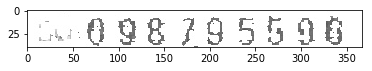

In [26]:
# retval, threshold = cv2.threshold(img, 10, 10, cv2.THRESH_BINARY)
img = cv2.imread("/Users/kidio/final.jpg")
abc = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
abc = cv2.bitwise_not(abc)
x, y  = abc.shape
im = np.zeros(abc.shape).astype('uint8')

size = 3
for i in range(x-size):
    for j in range(y-size):
        if abc[i,j] > 45 and i > size and j >size:
            im[i-size:i+size,j-size:j+size] = 255
            
# cv2.rectangle(im, (10,10), (30,50), 30)
# plt.imshow(im)

abc = im
print abc.shape
fake = np.zeros(abc.shape).astype('uint8')

blurred = cv2.GaussianBlur(abc, (5, 5), 0)
xyz = cv2.Canny(abc, 200, 255)


cnts, _ = cv2.findContours(xyz, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

print len(cnts)
i=0
for c in cnts:
    
    if cv2.arcLength(c, True) > 100 :
#         peri = cv2.arcLength(c, True)
#         appro =  cv2.approxPolyDP(c, 0.4* peri, True)
        cv2.drawContours(im, c, -1 , 200, -1)
    
        ymax , ymin = np.max(c[:,0,0]), np.min(c[:,0,0])
        xmax , xmin = np.max(c[:,0,1]), np.min(c[:,0,1])
        
        core = img[ xmin:xmax, ymin:ymax]
        npad = ( (8,8), (8,8), (0, 0))
        pad_img = np.pad(core, pad_width=npad, mode='constant', constant_values=255)
        
        cv2.imwrite("/Users/kidio/crop/"+str(ymax)+"-"+str(xmax)+".jpg", np.array(pad_img))
        
# for i in range(y-10):
#     if sum(xyz[:,i:i+1]) < 100:
#         fake[:,i] = 0

plt.imshow(img)

cv2.imwrite("/Users/kidio/cnt.jpg", img)

In [53]:
# retval, threshold = cv2.threshold(img, 10, 10, cv2.THRESH_BINARY)
def temp(pic):
    img = cv2.imread(pic)
    abc = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    abc = cv2.bitwise_not(abc)
    x, y  = abc.shape
    im = np.zeros(abc.shape).astype('uint8')

    size = 3
    for i in range(x-size):
        for j in range(y-size):
            if abc[i,j] > 80 and i > size and j >size:
                im[i-size:i+size,j-size:j+size] = 255

    abc = im
    print abc.shape
    fake = np.zeros(abc.shape).astype('uint8')

    blurred = cv2.GaussianBlur(abc, (5, 5), 0)
    xyz = cv2.Canny(abc, 200, 255)


    cnts, _ = cv2.findContours(xyz, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

    print len(cnts)
    i=0
    for c in cnts:
        if cv2.arcLength(c, True) > 100 :

            i = i + 1
            x,y,w,h = cv2.boundingRect(c)

            print cv2.boundingRect(c)

            core = img[y:y+h,x:x+w]
            npad = ( (10,10), (10,10), (0, 0))
            pad_img = np.pad(core, pad_width=npad, mode='constant', constant_values=255)

            cv2.imwrite("/Users/kidio/crop/"+str(y)+str(x)+".jpg", np.array(pad_img))


    plt.imshow(im)

    cv2.imwrite("/Users/kidio/cnt.jpg", abc)

In [42]:
img = cv2.imread('/Volumes/Data/Dropbox (Personal)/Screenshots/digits/black.png')

In [43]:
img_hsv=cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [ ]:
# cvInRangeS(imgHSV, cvScalar(0, 0, 0, 0), cvScalar(180, 255, 30, 0), imgThreshold);

In [36]:
lower_black = np.array([0, 0, 200])
upper_black = np.array([180, 255, 255])
mask2 = cv2.inRange(img_hsv, lower_black, upper_black)

In [37]:
# set my output img to zero everywhere except my mask
output_img = img.copy()
# output_img[np.where(mask==0)] = 0
output_img = cv2.bitwise_or(output_img, output_img, mask= mask2)

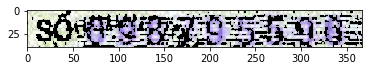

In [38]:
plt.imshow(output_img)

In [39]:
kernel = np.ones((5,5),np.uint8)
#output_img = cv2.morphologyEx(output_img, cv2.MORPH_OPEN, kernel)
output_img = cv2.dilate(output_img,kernel,iterations = 1)

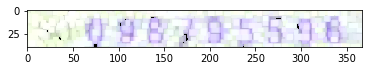

In [40]:
plt.imshow(output_img)

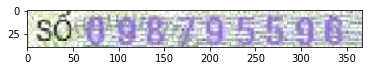

In [41]:
plt.imshow(img)

In [108]:
def pad(array, reference, offsets):
    """
    array: Array to be padded
    reference: Reference array with the desired shape
    offsets: list of offsets (number of elements must be equal to the dimension of the array)
    """
    # Create an array of zeros with the reference shape
    result = np.zeros(reference.shape)
    # Create a list of slices from offset to offset + shape in each dimension
    insertHere = [slice(offset[dim], offset[dim] + array.shape[dim]) for dim in range(a.ndim)]
    # Insert the array in the result at the specified offsets
    result[insertHere] = a
    return result

In [102]:
# 3 Dimensions

a = np.ones((18, 32, 3))
b = np.zeros((23, 37, 3))
offset = [1,0,0]
pad(a, b, offset)

array([[[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        ..., 
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        ..., 
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       ..., 
       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,

In [127]:
def padwithtens(vector, pad_width, iaxis, kwargs):
    vector[:pad_width[0]] = 10
    vector[-pad_width[1]:] = 10
    return vector

a  = np.zeros(8)
a = a.reshape((2,2,2))
np.lib.pad(a, 1, padwithtens)

array([[[ 10.,  10.,  10.,  10.],
        [ 10.,  10.,  10.,  10.],
        [ 10.,  10.,  10.,  10.],
        [ 10.,  10.,  10.,  10.]],

       [[ 10.,  10.,  10.,  10.],
        [ 10.,   0.,   0.,  10.],
        [ 10.,   0.,   0.,  10.],
        [ 10.,  10.,  10.,  10.]],

       [[ 10.,  10.,  10.,  10.],
        [ 10.,   0.,   0.,  10.],
        [ 10.,   0.,   0.,  10.],
        [ 10.,  10.,  10.,  10.]],

       [[ 10.,  10.,  10.,  10.],
        [ 10.,  10.,  10.,  10.],
        [ 10.,  10.,  10.,  10.],
        [ 10.,  10.,  10.,  10.]]])

In [140]:
a = np.ones((2, 2, 2))
print a

# npad is a tuple of (n_before, n_after) for each dimension
npad = ( (1,1), (1,1), (0, 0))
b = np.pad(a, pad_width=npad, mode='constant', constant_values=0)

print(b.shape)
# (4, 6, 5)
print b

[[[ 1.  1.]
  [ 1.  1.]]

 [[ 1.  1.]
  [ 1.  1.]]]
(4, 4, 2)
[[[ 0.  0.]
  [ 0.  0.]
  [ 0.  0.]
  [ 0.  0.]]

 [[ 0.  0.]
  [ 1.  1.]
  [ 1.  1.]
  [ 0.  0.]]

 [[ 0.  0.]
  [ 1.  1.]
  [ 1.  1.]
  [ 0.  0.]]

 [[ 0.  0.]
  [ 0.  0.]
  [ 0.  0.]
  [ 0.  0.]]]


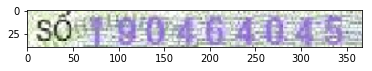

In [75]:
img_path = "/Volumes/Data/WORKSPACE/git/bagiks/CMT-Text-Detection/upload/229484941252718-2015.12.05-17.14.47.jpg"
img = cv2.imread(img_path)
plt.imshow(img)

In [93]:
# import the necessary packages
import numpy as np
import cv2

def centroid_histogram(clt):
    # grab the number of different clusters and create a histogram
    # based on the number of pixels assigned to each cluster
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    (hist, _) = np.histogram(clt.labels_, bins = numLabels)

    # normalize the histogram, such that it sums to one
    hist = hist.astype("float")
    hist /= hist.sum()

    # return the histogram
    return hist



def plot_colors(hist, centroids):
    # initialize the bar chart representing the relative frequency
    # of each of the colors
    bar = np.zeros((50, 300, 3), dtype = "uint8")
    startX = 0

    # loop over the percentage of each cluster and the color of
    # each cluster
    for (percent, color) in zip(hist, centroids):
        # plot the relative percentage of each cluster
        endX = startX + (percent * 300)
        cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
            color.astype("uint8").tolist(), -1)
        startX = endX
        
    
    # return the bar chart
    return bar

146184941163422-2015.12.05-12.56.56.jpg [ 164.66108495  221.50031668]


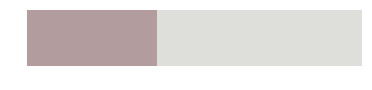

229484941252718-2015.12.05-17.14.47.jpg [ 220.90378366  164.19398637]


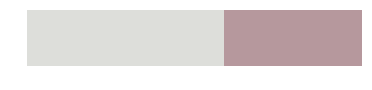

32584941172522-2015.12.05-11.36.03.jpg [ 164.46573284  221.4014248 ]


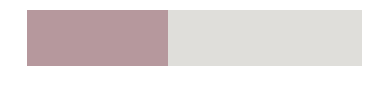

341884941172522-2015.12.05-11.36.03.jpg [ 221.4014248   164.46573284]


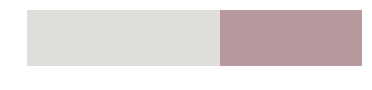

381684941344928-2015.12.05-11.05.55.jpg [ 163.78555317  221.02203921]


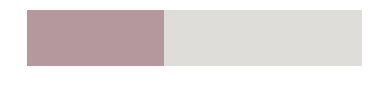

463484941344928-2015.12.05-11.05.55.jpg [ 220.97880473  163.72422538]


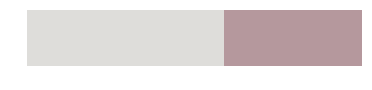

477384941349022-2015.12.05-10.03.27.jpg [ 165.41655907  221.76112338]


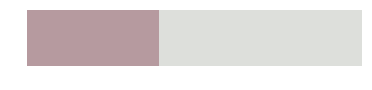

59784941302822-2015.12.05-16.23.14.jpg [ 221.28876137  164.74375411]


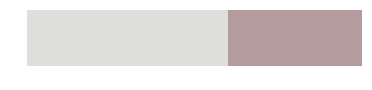

732184941252718-2015.12.05-17.14.47.jpg [ 164.14301448  220.86723851]


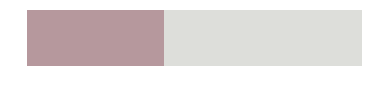

7517841252336185-2015.08.14-10.30.10.jpg [ 221.05420805  164.11131407]


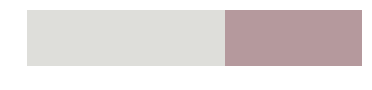

808284941364133-2015.12.05-10.36.59.jpg [ 222.08595128  165.1911558 ]


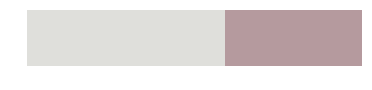

815684941302822-2015.12.05-16.23.14.jpg [ 221.14239552  164.51921803]


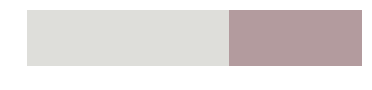

972984941172522-2015.12.05-11.36.03.jpg [ 164.46573284  221.4014248 ]


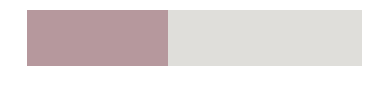

In [117]:
import os
from sklearn.cluster import KMeans
PATH = "/Volumes/Data/WORKSPACE/git/bagiks/CMT-Text-Detection/upload"
for i in os.listdir(PATH):

    img = cv2.imread(os.path.join(PATH, i))
    image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    image = image.reshape((image.shape[0] * image.shape[1], 3))
    
    # cluster the pixel intensities
    clt = KMeans(n_clusters = 2)
    clt.fit(image)
    
    hist = centroid_histogram(clt)
    bar = plot_colors(hist, clt.cluster_centers_)
    dominant_colors = np.mean(clt.cluster_centers_, axis=1)
    if 160 < dominant_colors[0] < 170 or 160 <dominant_colors[1] < 170 :
        print i, dominant_colors
        # show our color bart
        plt.figure()
        plt.axis("off")
        plt.imshow(bar)
        plt.show()

In [123]:
def is_dominant_color(img_path, img_mean):
    img = cv2.imread(img_path)
    image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    image = image.reshape((image.shape[0] * image.shape[1], 3))
    print image.shape
    # cluster the pixel intensities
    clt = KMeans(n_clusters=2)
    clt.fit(image)

    dominant_colors = np.mean(clt.cluster_centers_, axis=1)
    return img_mean - 5 < dominant_colors[0] < img_mean + 5 or img_mean - 5 < dominant_colors[1] < img_mean + 5

In [124]:
import os
from sklearn.cluster import KMeans
PATH = "/Volumes/Data/WORKSPACE/git/bagiks/CMT-Text-Detection/upload"
for i in os.listdir(PATH):
    do = is_dominant_color(os.path.join(PATH, i), 165)
    if do:
        print i

(4004, 3)
(8181, 3)
(3861, 3)
(14680, 3)
146184941163422-2015.12.05-12.56.56.jpg
(19826, 3)
(18774, 3)
(13946, 3)
(14370, 3)
(14364, 3)
(18354, 3)
(4611, 3)
(13280, 3)
(14370, 3)
(16286, 3)
(9251, 3)
(4147, 3)
(12478, 3)
(4147, 3)
(2470, 3)
(14370, 3)
(14680, 3)
229484941252718-2015.12.05-17.14.47.jpg
(14370, 3)
(15085, 3)
(18774, 3)
(14763, 3)
(19826, 3)
(15414, 3)
(18774, 3)
(14370, 3)
(18774, 3)
(17671, 3)
(8697, 3)
(8181, 3)
(8181, 3)
(14370, 3)
(4611, 3)
(14680, 3)
32584941172522-2015.12.05-11.36.03.jpg
(18327, 3)
(14680, 3)
341884941172522-2015.12.05-11.36.03.jpg
(5565, 3)
(17845, 3)
(14370, 3)
(12639, 3)
(18774, 3)
(18327, 3)
(14680, 3)
381684941344928-2015.12.05-11.05.55.jpg
(13891, 3)
(18327, 3)
(4004, 3)
(13946, 3)
(13946, 3)
(18327, 3)
(8181, 3)
(10881, 3)
(14680, 3)
463484941344928-2015.12.05-11.05.55.jpg
(2470, 3)
(18327, 3)
(14370, 3)
(15703, 3)
477384941349022-2015.12.05-10.03.27.jpg
(12478, 3)
(4611, 3)
(18327, 3)
(3861, 3)
(14370, 3)
(16286, 3)
(5250, 3)
(14370, 3)
(55

42 383


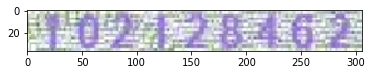

In [34]:
img_path = "/Users/kidio/git/bagiks/CMT-Text-Detection/dataset/ID/102128462.jpg"
img = cv2.imread(img_path)
y,x,_ = img.shape
print y, x
plt.imshow(img[0+5:y, 53:359,:])